In [32]:
import os
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize   

file_path = "../../data/raw/yp_competitors.json"
if os.path.exists(file_path):    
    dataset = pd.read_json(file_path, orient='columns')    
else: 
    print("file not yet created")
    
dataset.head()

,alias,categories,coordinates,display_phone,dist_to_alias,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,kimos-maui-lahaina,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 20.87595, 'longitude': -156.68056}",(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,"{'address1': '845 Front St', 'address2': 'Ste ...",Kimo's Maui,+18086614811,$$,4.0,2567,[],https://www.yelp.com/biz/kimos-maui-lahaina?ad...
1,lahaina-fish-lahaina,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 20.8760421040478, 'longitude': -1...",(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,"{'address1': '831 Front St', 'address2': '', '...",Lahaina Fish,+18086613472,$$,4.0,1947,[],https://www.yelp.com/biz/lahaina-fish-lahaina?...
2,blu-maui-lahaina,"[{'alias': 'restaurants', 'title': 'Restaurant...","{'latitude': 20.87581, 'longitude': -156.68044}",(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,,False,"{'address1': '839 Front St', 'address2': None,...",Blu Maui,+18086619591,NaN,4.0,1,[],https://www.yelp.com/biz/blu-maui-lahaina?adju...
3,the-dirty-monkey-lahaina,"[{'alias': 'sportsbars', 'title': 'Sports Bars...","{'latitude': 20.87614, 'longitude': -156.68013}",(808) 419-6268,kimos-maui-lahaina,51.873763,4UH_LSVtf41B1Cr6lx2-5g,https://s3-media1.fl.yelpcdn.com/bphoto/tLyR3z...,False,"{'address1': '844 Front St', 'address2': 'Upst...",The Dirty Monkey,+18084196268,$$,4.0,287,[],https://www.yelp.com/biz/the-dirty-monkey-laha...
4,lahaina-sushi-ko-lahaina-2,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...","{'latitude': 20.87614, 'longitude': -156.68013}",(808) 214-5352,kimos-maui-lahaina,51.873763,aeG9ZSWgTV4AEA11ev3Gtw,https://s3-media3.fl.yelpcdn.com/bphoto/Mi_AFu...,False,"{'address1': '844 Front St', 'address2': 'Ste ...",Lahaina Sushi Ko,+18082145352,$$,4.5,118,[],https://www.yelp.com/biz/lahaina-sushi-ko-laha...


In [33]:
print(f"{len(dataset)}")
print(f"{len(dataset.alias.unique())}")

6662
6662


In [34]:
dataset[dataset.alias == "kimos-maui-lahaina"]

,alias,categories,coordinates,display_phone,dist_to_alias,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,kimos-maui-lahaina,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 20.87595, 'longitude': -156.68056}",(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,"{'address1': '845 Front St', 'address2': 'Ste ...",Kimo's Maui,+18086614811,$$,4.0,2567,[],https://www.yelp.com/biz/kimos-maui-lahaina?ad...


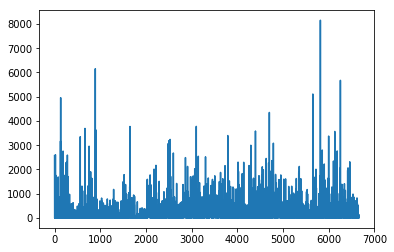

In [35]:
import matplotlib.pyplot as plt
dataset.review_count.plot()
plt.show()

In [37]:
yelp_branches = [
    'kimos-maui-lahaina',
    'sunnyside-tahoe-city-2',
    'dukes-huntington-beach-huntington-beach-2',
    'dukes-la-jolla-la-jolla',
    'dukes-malibu-malibu-2',
    'dukes-beach-house-lahaina',
    'dukes-kauai-lihue-3',
    'dukes-waikiki-honolulu-2',
    'hula-grill-waikiki-honolulu-3',
    'hula-grill-kaanapali-lahaina-2',
    'keokis-paradise-koloa',
    'leilanis-lahaina-2'
]
[i for i in dataset.alias.values if i in yelp_branches]

['kimos-maui-lahaina',
 'leilanis-lahaina-2',
 'hula-grill-kaanapali-lahaina-2',
 'dukes-beach-house-lahaina',
 'sunnyside-tahoe-city-2',
 'dukes-huntington-beach-huntington-beach-2',
 'dukes-la-jolla-la-jolla',
 'dukes-malibu-malibu-2',
 'dukes-kauai-lihue-3',
 'keokis-paradise-koloa',
 'dukes-waikiki-honolulu-2',
 'hula-grill-waikiki-honolulu-3']

In [38]:
dataset.is_closed[dataset.is_closed == True].count()

0

In [39]:
dataset.price.value_counts()

$$      2515
$       1953
$$$      312
$$$$      71
Name: price, dtype: int64

In [40]:
dataset.loc[dataset.alias.isin(yelp_branches)].price.value_counts()

$$    12
Name: price, dtype: int64

In [44]:
print(dataset.loc[dataset.alias.isin(yelp_branches)].review_count.sum())
print(dataset.loc[dataset.alias.isin(yelp_branches)].review_count.mean())

26357
2196.4166666666665


In [43]:
print(f"sum : {dataset.review_count.sum()}")
print(f"mean: {dataset.review_count.mean()}")

sum : 1414988
mean: 212.39687781447012


In [42]:
len(dataset)

6662